# Week1 Report: Data Observation

In [2]:
import scipy.io as sio
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

## Data Correlation
- Mostly normalized and original correlation matrix looks the same, except for voxelwise ones

In [191]:
# Normalized
rdata = sio.loadmat('D:/ML/data/Data_normalized/rData.mat')['rData_all'].T
cdata = sio.loadmat('D:/ML/data/Data_normalized/cData.mat')['cData_all'].T
xdata = sio.loadmat('D:/ML/data/Data_normalized/xData.mat')['xData_all'].T
pdata = sio.loadmat('D:/ML/data/Data_normalized/pData.mat')['pData_all'].T
xdata.shape

(176, 100)

In [207]:
# Original (used for voxelwise)
# rdata = sio.loadmat('D:/ML/data/Data_original/rData.mat')['rData_all'].T
# cdata = sio.loadmat('D:/ML/data/Data_original/cData.mat')['cData_all'].T
# xdata = sio.loadmat('D:/ML/data/Data_original/xData.mat')['xData_all'].T
# pdata = sio.loadmat('D:/ML/data/Data_original/pData.mat')['pData_all'].T

In [192]:
pos = sio.loadmat('D:/ML/data/PANSS_original/posPANSS.mat')['pos_all'].T
neg = sio.loadmat('D:/ML/data/PANSS_original/negPANSS.mat')['neg_all'].T
gen = sio.loadmat('D:/ML/data/PANSS_original/genPANSS.mat')['gen_all'].T
tot = sio.loadmat('D:/ML/data/PANSS_original/totPANSS.mat')['tot_all'].T
score = np.hstack((pos,neg,gen,tot))
score.shape

(176, 4)

### Individual feature

In [193]:
r = pd.DataFrame(data=np.hstack((rdata,score)))
c = pd.DataFrame(data=np.hstack((cdata,score)))
x = pd.DataFrame(data=np.hstack((xdata,score)))
# pdata is too large to observe directly
c.shape

(176, 6674)

**Geometry Information:** 148*6
- PANSS have obvious inner correlation
- The final box has low correlation with PANSS 
- Inverse correlation?

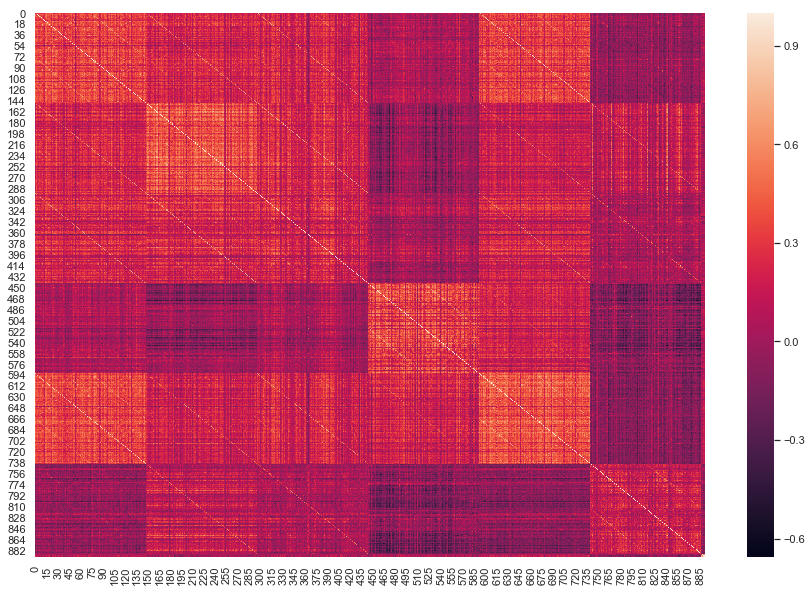

In [194]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(r.corr())

**Functional Connectivity:** 115*228
- No obvious difference in correlation with PANSS

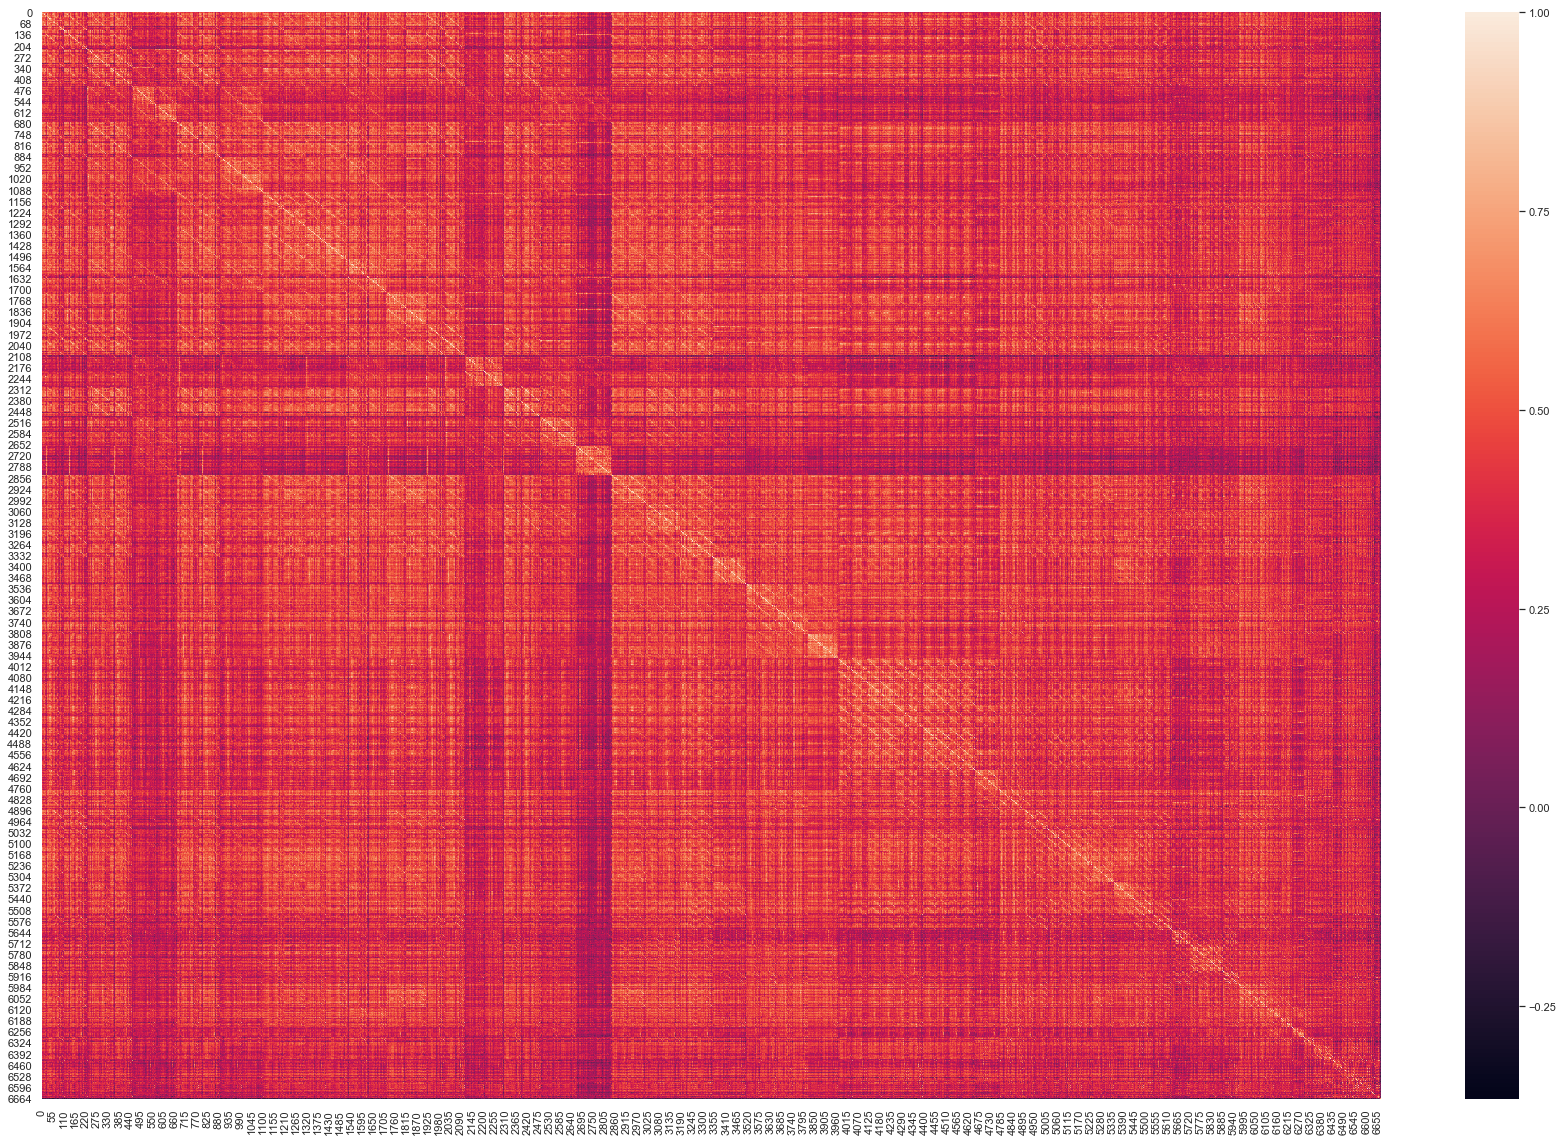

In [195]:
plt.figure(figsize=(30,20))
ax = sns.heatmap(c.corr())

**DTI:** 50*2
- No obvious difference in correlation with PANSS
- The second one has inverse self-correlation (what if inverse the top-right and bottom-left element)

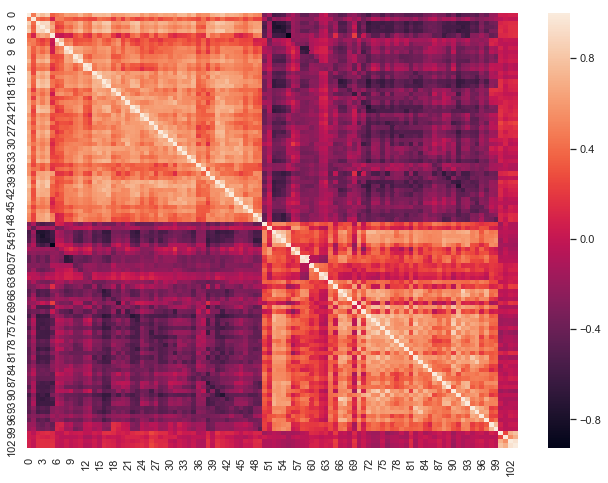

In [196]:
plt.figure(figsize=(11,8))
ax = sns.heatmap(x.corr())

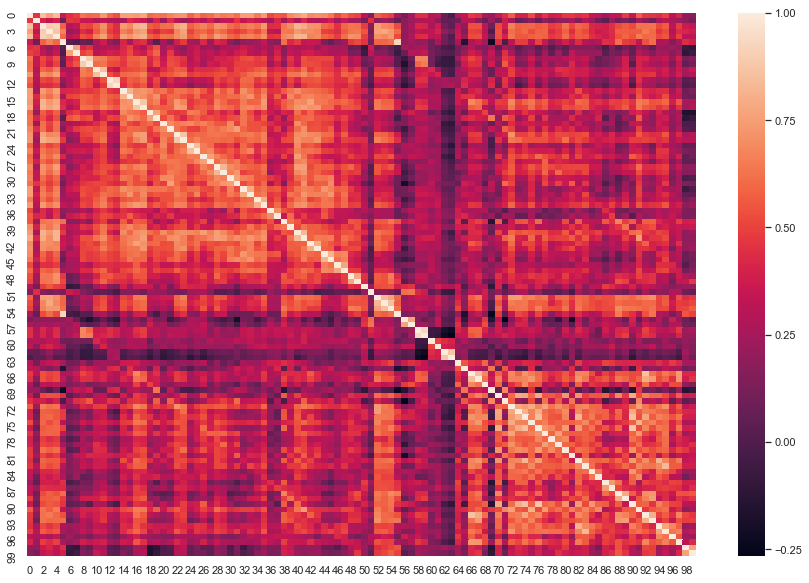

In [197]:
# Try inverse correlation
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()  
xdata_inv = min_max_scaler.fit_transform(-xdata[:,50:100])

x_inv = pd.DataFrame(data=np.hstack((xdata[:,0:50],xdata_inv)))
plt.figure(figsize=(15,10))
ax = sns.heatmap(x_inv.corr())

**Voxel-wise** 70831
- pos_PANSS and neg_PANSS are relatively independent
- pos_PANSS might be more important in normalized voxel-wise signal; yet for original data, it is not obvious.

**Normalized**

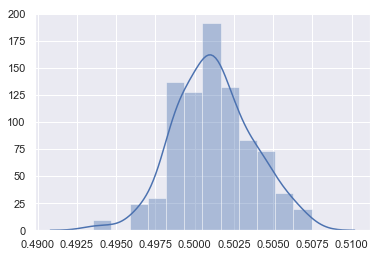

In [198]:
p_sub_mean = pd.Series(np.mean(pdata,axis=1))
sns.distplot(p_sub_mean)

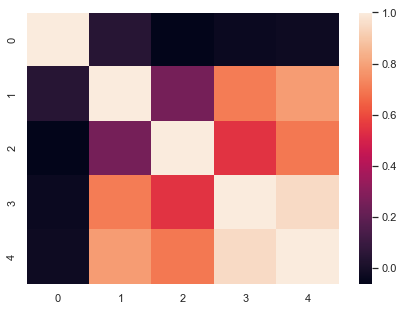

In [199]:
p = pd.DataFrame(data=np.hstack((np.mat(p_sub_mean).T,score)))
plt.figure(figsize=(7,5))
ax = sns.heatmap(p.corr())

**Original**

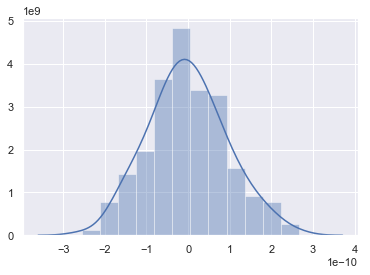

In [185]:
p_sub_mean = pd.Series(np.mean(pdata,axis=1))
sns.distplot(p_sub_mean)

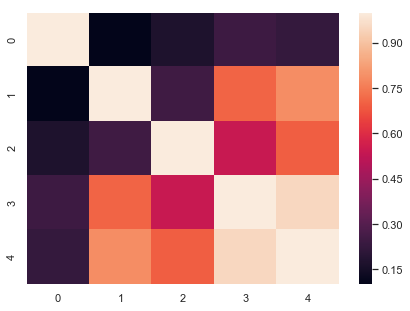

In [186]:
p = pd.DataFrame(data=np.hstack((np.mat(p_sub_mean).T,score)))
plt.figure(figsize=(7,5))
ax = sns.heatmap(p.corr())

### Merged Features
- merge cubes

In [204]:
Data = [rdata, cdata, xdata]
Length = [rdata.shape[1],cdata.shape[1],xdata.shape[1]]
Stepsize = [148,115,50]

output=[]
for j in range(0,3):
    tmp1 = []
    data = Data[j]
    length = Length[j]
    stepsize = Stepsize[j]
    num  = int(length/stepsize)
    for i in range(0,num):
        mean = np.mean(data[:,6*num:6*(num+1)-1],axis=1)
        tmp1.append(mean)
    tmp2 = np.array(tmp1).reshape(176,num)
    output.append(tmp2)

In [205]:
merged = np.hstack((output[1],output[0],output[2]))
merged.shape

(176, 66)

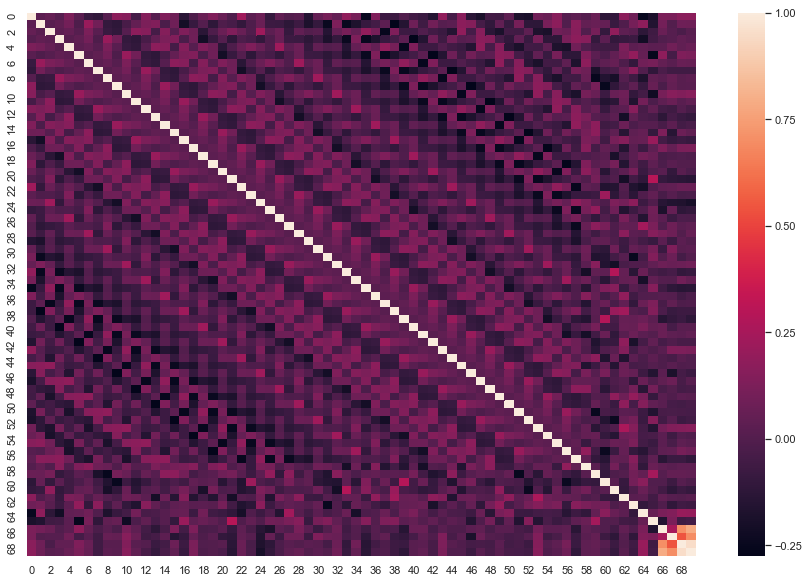

In [206]:
merged_PANSS = pd.DataFrame(data=np.hstack((merged,score)))
plt.figure(figsize=(15,10))
ax = sns.heatmap(merged_PANSS.corr())

- No obvious influencial individuals
- Functional connectivity may need more preprocessing